# Widgets

* [Interaction](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html)
* [List of widgets](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html)

Good tutorials:
* [Intro and basic interactive plotting](https://www.youtube.com/watch?v=6SHnmho7zCs)
* [Dashboard](https://towardsdatascience.com/bring-your-jupyter-notebook-to-life-with-interactive-widgets-bc12e03f0916)

In [1]:
import ipywidgets as widgets
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import display

## Basic interact

In [2]:
def f(x):
    return x

In [3]:
widgets.interact(f,x=1)
widgets.interact(f,x=1.0)
widgets.interact(f,x='Hello')
widgets.interact(f,x=True)
widgets.interact(f,x=['apple','orange','more tasty stuff'])
widgets.interact(f,x=[('option 1',100),('option 2',200)])
print()

interactive(children=(IntSlider(value=1, description='x', max=3, min=-1), Output()), _dom_classes=('widget-int…

interactive(children=(FloatSlider(value=1.0, description='x', max=3.0, min=-1.0), Output()), _dom_classes=('wi…

interactive(children=(Text(value='Hello', description='x'), Output()), _dom_classes=('widget-interact',))

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

interactive(children=(Dropdown(description='x', options=('apple', 'orange', 'more tasty stuff'), value='apple'…

interactive(children=(Dropdown(description='x', options=(('option 1', 100), ('option 2', 200)), value=100), Ou…

## Formatted widgets

In [4]:
name = widgets.Text(
    description='Name'
    ,placeholder='Enter a name'
    ,disabled=False
)
age = widgets.IntSlider(
    description='Age'
    ,value=20
)

def myprint(n,a):
    out = 'Who are you?'
    if n=='Mauricio':
        out = '''Oh! You are Mauricio. 
        I have heard of you. 
        You are %i years old ... I have heard something else around 33.
        The double of your age is %i.
        ''' % (a,2*a)
    else:
        out = 'Hi %s! You are %i years old' % (n,a)    
    print(out)
    return 
    
widgets.interact(myprint,n=name,a=age)
print()

interactive(children=(Text(value='', description='Name', placeholder='Enter a name'), IntSlider(value=20, desc…

## Basic interactive plotting

In [5]:
def plot(p):
    x = np.linspace(0,2,20)
    f = x**2+p
    plt.plot(x,f)
    plt.ylim([0,4])
    
p_slider = widgets.FloatSlider(
    value = 1.0
    ,min = 0.0
    ,max = 2.0
    ,step = 0.1
)

widgets.interact(plot,p=p_slider)
widgets.interact(plot,p=[1,2,3])
print()

interactive(children=(FloatSlider(value=1.0, description='p', max=2.0), Output()), _dom_classes=('widget-inter…

interactive(children=(Dropdown(description='p', options=(1, 2, 3), value=1), Output()), _dom_classes=('widget-…

In [19]:
w = widgets.interactive(plot,{'manual':True},p=p_slider)
w.children[1].description = 'Run/Update'

In [20]:
display(w)

interactive(children=(FloatSlider(value=1.4, description='p', max=2.0), Button(description='Run/Update', style…

In [24]:
w.children[2]

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<Figure size 432x288 with 1 Axes>', 'i…

In [25]:
def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = widgets.interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '150px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

## Separating controls from UI

In [26]:
label = widgets.Text('bla')
p1 = widgets.IntSlider(2,min=0,max=5)
p2 = widgets.IntSlider(2,min=0,max=5)

head = widgets.HBox([label,p1,p2])

def action(l,a,b):
    x = np.linspace(0,2,20)
    f1 = a+x
    f2 = a+x**b
    fig,ax = plt.subplots(1,2)
    ax[0].plot(x,f1)
    ax[0].set_xlabel(l)
    ax[0].set_ylim([0,10])
    ax[1].plot(x,f2)
    ax[1].set_ylim([0,10])
    
bottom = widgets.interactive_output(action,{'l':label,'a':p1,'b':p2})

display(head)
display(bottom)

Output()

In [27]:
bottom_manual = widgets.interactive(action,{'manual':True},l=label,a=p1,b=p2)

In [36]:
display(head)
display(bottom_manual.children[-2])
display(bottom_manual.children[-1])

Button(description='Run Interact', style=ButtonStyle())

Output()

## A slightly more complicated example

In [78]:
def bV(c1s,c2s,f2):
    return np.array([1-f2,f2])@np.array([c1s,c2s])

def bR(c1s,c2s,f2):
    return 1/(np.array([1-f2,f2])@np.array([1/c1s,1/c2s]))

def plot(c1s,c2s):
    f2s = np.linspace(0,1,20)
    
    pV = np.array([bV(c1s,c2s,f2) for f2 in f2s]) 
    pR = np.array([bR(c1s,c2s,f2) for f2 in f2s])
    
    fig,ax = plt.subplots(1,2,figsize=(10,4))
    
    ax[0].plot(f2s,pV[:,0],label='Voigt')
    ax[0].plot(f2s,pR[:,0],label='Reuss')
    ax[0].set_ylim(0)
    
    ax[1].plot(f2s,pV[:,1],label='Voigt')
    ax[1].plot(f2s,pR[:,1],label='Reuss')
    ax[1].set_ylim(0)
    

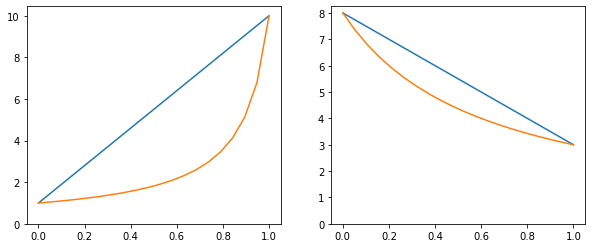

In [79]:
c1s = np.array([1,8])
c2s = np.array([10,3])

bV(c1s,c2s,0.1)

plot(c1s,c2s)

In [84]:
c11 = widgets.IntSlider(1,min=1,max=10,description='c11 = 3K1')
c12 = widgets.IntSlider(1,min=1,max=10,description='c12 = 2G1')

c21 = widgets.IntSlider(10,min=1,max=10,description='c21 = 3K2')
c22 = widgets.IntSlider(10,min=1,max=10,description='c22 = 2G2')

head1 = widgets.HBox([widgets.Label('Material 1'),c11,c12])
head2 = widgets.HBox([widgets.Label('Material 2'),c21,c22])

def plot2(c11,c12,c21,c22):
    plot(np.array([c11,c12]),np.array([c21,c22]))

bottom_manual = widgets.interactive(
    plot2
    ,{'manual':True}
    ,c11=c11,c12=c12,c21=c21,c22=c22
)
bottom_manual.children[-2].description = 'Run/Update'

In [85]:
display(head1)
display(head2)
display(bottom_manual.children[-2])
display(bottom_manual.children[-1])

Button(description='Run/Update', style=ButtonStyle())

Output()